<h2>Loading Libraries</h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sn
%matplotlib inline

<h2>DataSet :</h2>

    1. Context:
    
        This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.
        
    Content:
    
        The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.
        
    2. Columns:
    
        - Pregnancies:  Number of times pregnant
        - Glucose:  Plasma glucose concentration a 2 hours in an oral glucose tolerance test
        - BloodPressure:  Diastolic blood pressure (mm Hg)
        - SkinThickness:  Triceps skin fold thickness (mm)
        - Insulin:  2-Hour serum insulin (mu U/ml)
        - BMI:  Body mass index (weight in kg/(height in m)^2)
        - DiabetesPedigreeFunction:  Diabetes pedigree function
        - Age:  Age (years)
        - Outcome:  Class variable (0 or 1) 268 of 500 are 1, the others are 0
    

Variables :

Each attribute is a potential risk factor. There are both demographic, behavioural and medical risk factors.

    Demographic: (Sexe, Age)
    
    Behavioural: (currentSmoker, cigsPerDay)
    
    Medical( history): (BPMeds, prevalentStroke, prevalentHyp, diabetes)
    
    Medical(current): (totChol, sysBP, diaBP, BMI, heartRate, glucose)
    
    Predict variable (desired target): (10 year risk of coronary heart disease CHD)
    
    Outcome: Class variable (0 or 1)

In [2]:
diabet = pd.read_csv("Pima-Indian-Diabetes-DataSet.csv")
diabet.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<h2>Show the shape of DataSet: (Lines and Columns)</h2>

In [3]:
diabet.shape

(768, 9)

<h2>View some basic statistical details </h2>

In [4]:
diabet.describe()  

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<h2>Show the outcome:</h2>

    There are 500 patients with no Diabetes and 268 patients with risk of Diabetes.

0    500
1    268
Name: Outcome, dtype: int64


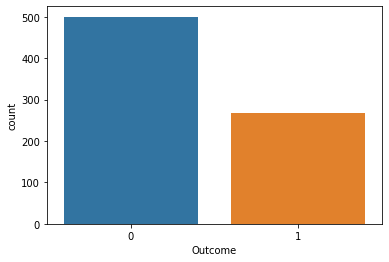

In [5]:
diabet.Outcome.value_counts()
print(diabet.Outcome.value_counts())
sn.countplot(x = 'Outcome', data = diabet)

<h2>We can see more details here</h2>

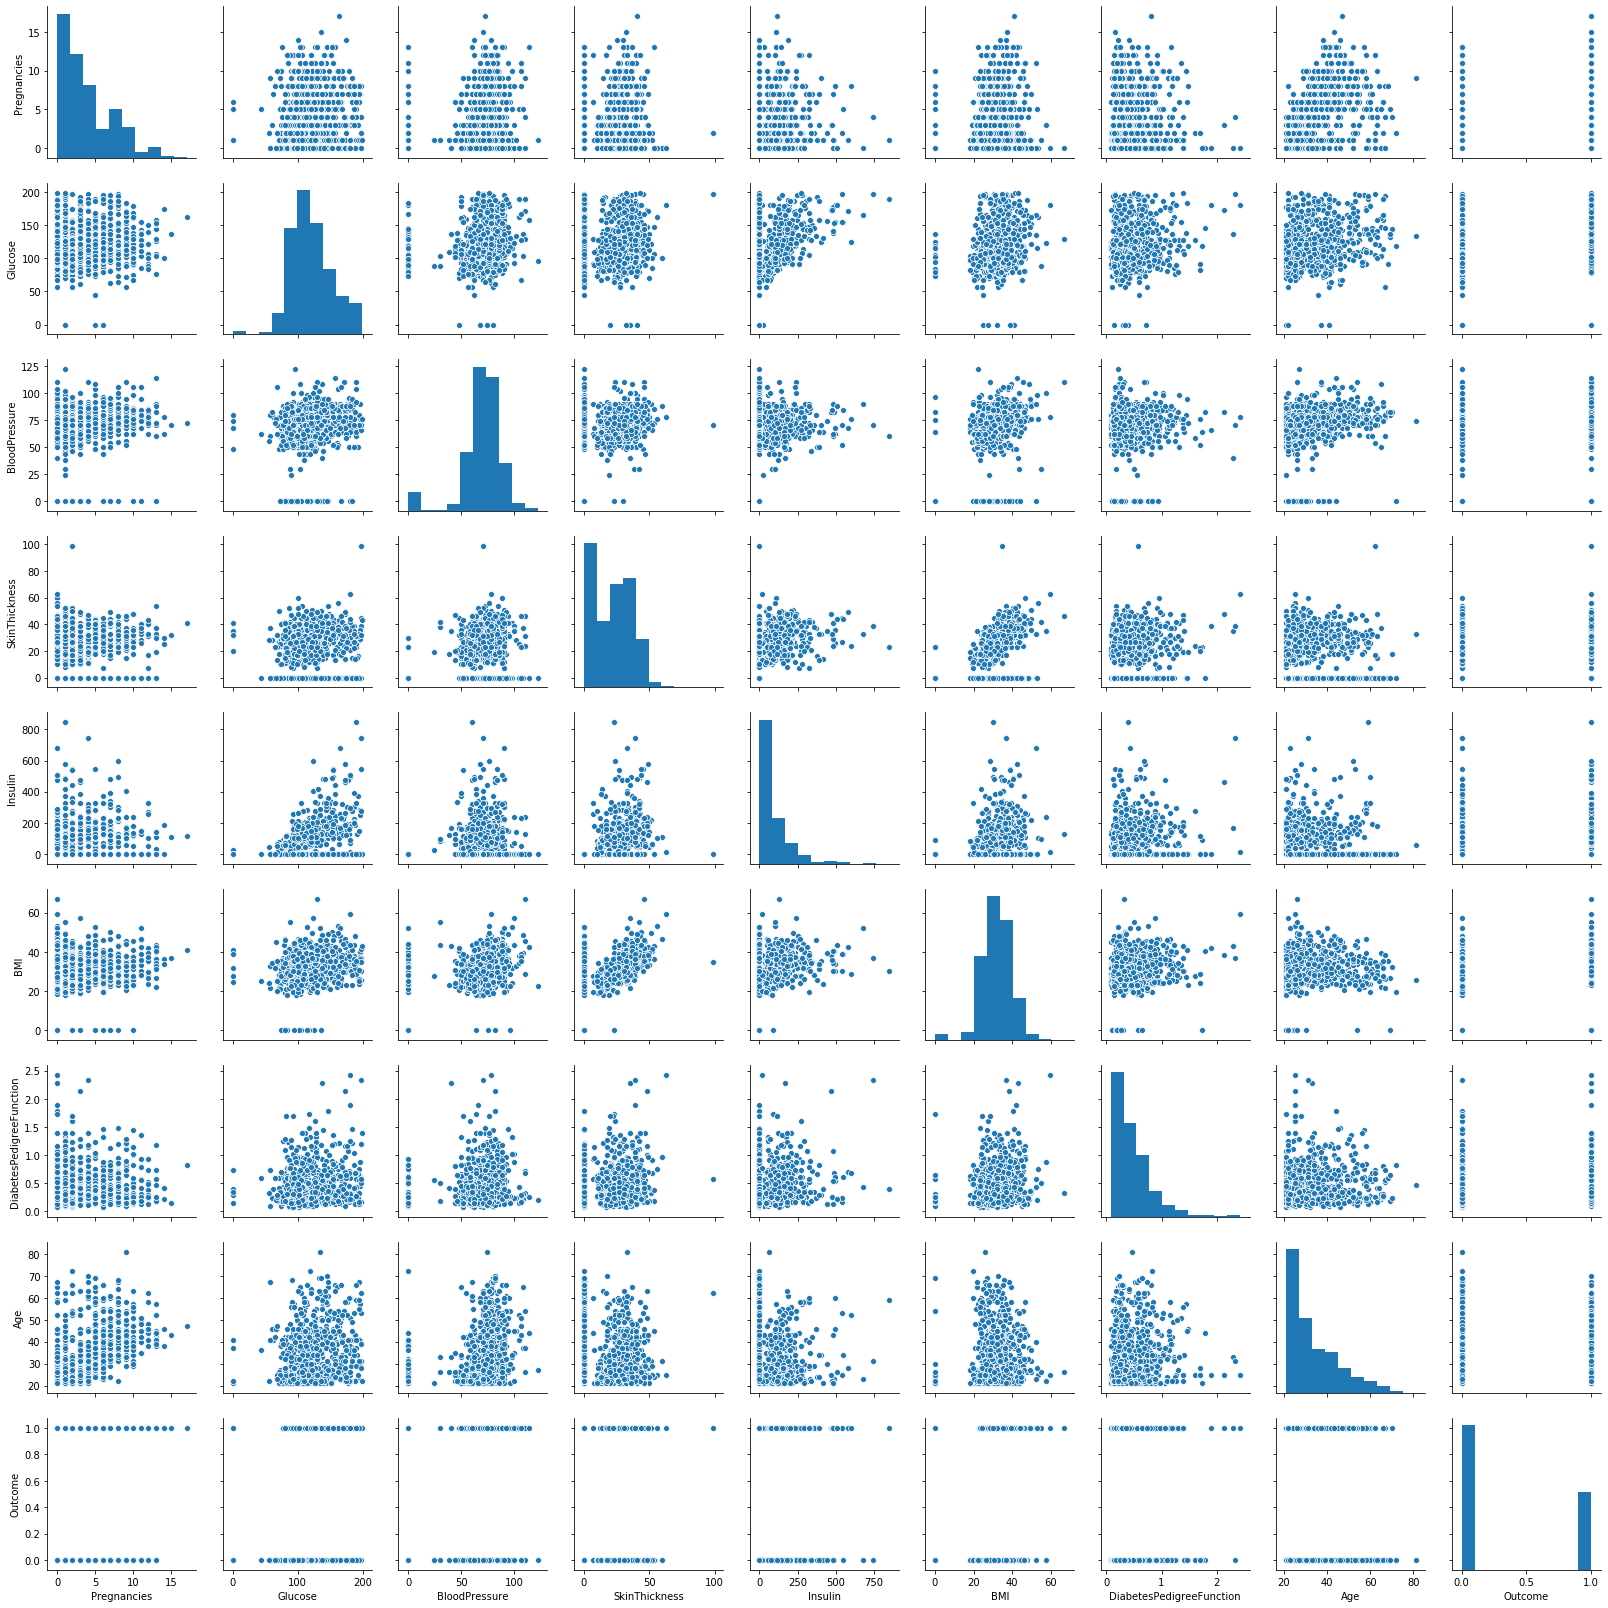

In [6]:
sn.pairplot(data = diabet)

<h2>Data Visualisation:</h2>

    Make a histogram of the DataFrame’s.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AD6C133588>,
      dtype=object)

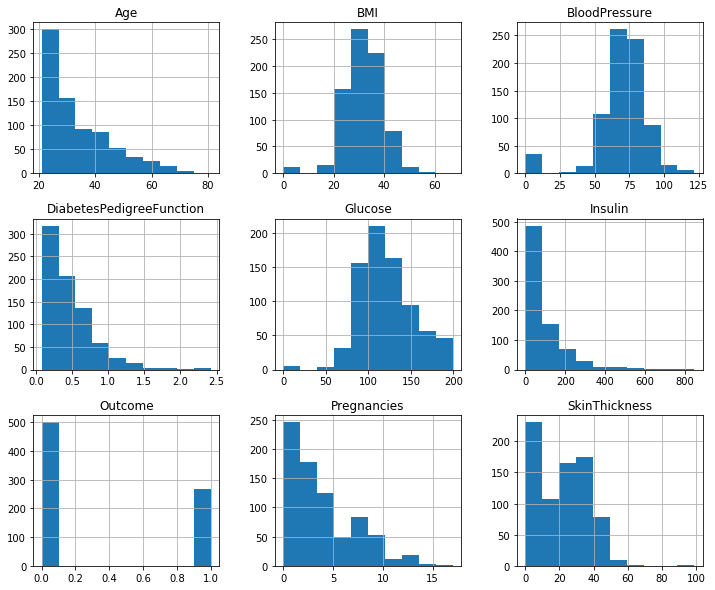

In [7]:
diabet.hist(figsize = (12, 10))

<h2>Show the correlations</h2>

In [8]:
corr = diabet.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<h2>Get correlations of each features in dataset, and plot heat map</h2>

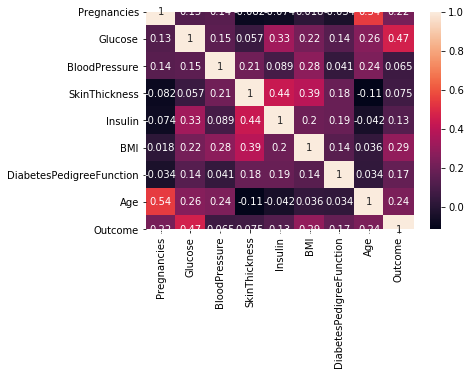

In [9]:
sns.heatmap(corr, annot = True)

<h2>Classification using 03 models:</h2>
    
    (KNN, SVM and LogisticRegression) and compare them

In [10]:
from sklearn.model_selection import train_test_split
import sklearn

feature_columns = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
predicted_class = ['Outcome']
    
X = diabet[feature_columns].values
Y = diabet[predicted_class].values

#Extract X:(Train and Test) and Y:(Train and Test)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.20,random_state=5)

In [11]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

<h2>Call the three Models</h2>

In [12]:
models = []
models.append(("KNN",KNeighborsClassifier()))
models.append(("SVM",SVC()))
models.append(("LR",LogisticRegression()))

In [13]:
results = []
names = []
for name,model in models:
    kfold = KFold(n_splits=10, random_state=22)
    cv_result = cross_val_score(model,X_train,Y_train, cv = kfold,scoring = "accuracy")
    names.append(name)
    results.append(cv_result)
for i in range(len(names)):
    print(names[i],results[i].mean())

C:\Users\PC\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\PC\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\PC\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\PC\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed 

KNN 0.7003966155473293
SVM 0.6512691697514542
LR 0.7624008461131676


C:\Users\PC\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\PC\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\PC\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\PC\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\PC\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.

<h2>Visualising Results</h2>

[Text(0, 0, 'KNN'), Text(0, 0, 'SVM'), Text(0, 0, 'LR')]

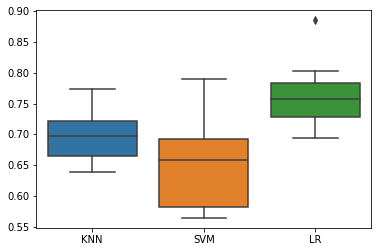

In [14]:
ax = sns.boxplot(data=results)
ax.set_xticklabels(names)

<h2>Final Prediction using Test Data</h2>

In [15]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

<h2>Calculate the accuracy of:  K Neighbors Classifier</h2>

In [16]:
knn = KNeighborsClassifier()
knn.fit(X_train,Y_train)
predictions = knn.predict(X_test)

print('Accuracy of KNN_Model: ', accuracy_score(Y_test,predictions))

Accuracy of KNN_Model:  0.7142857142857143


C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


<h2>Show a deep intuition of the classifierof :  K Neighbors Classifier</h2>

In [17]:
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.75      0.83      0.79       100
           1       0.61      0.50      0.55        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154



<h2>Calculate the accuracy of: SVM Classifier</h2>

In [18]:
svm = SVC()
svm.fit(X_train,Y_train)
predictions = svm.predict(X_test)

print('Accuracy of SVM_Model: ',accuracy_score(Y_test,predictions))

Accuracy of SVM_Model:  0.6493506493506493


C:\Users\PC\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\PC\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


<h2>Show a deep intuition of the classifierof: SVM Classifier</h2>

In [19]:
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.65      1.00      0.79       100
           1       0.00      0.00      0.00        54

    accuracy                           0.65       154
   macro avg       0.32      0.50      0.39       154
weighted avg       0.42      0.65      0.51       154



C:\Users\PC\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


<h2>Calculate the accuracy of: Logistic Regression Classifier</h2>

In [20]:
lr = LogisticRegression()
lr.fit(X_train,Y_train)
predictions = lr.predict(X_test)

print('Accuracy of LogisticRegression_Model: ',accuracy_score(Y_test,predictions))

Accuracy of LogisticRegression_Model:  0.7857142857142857


C:\Users\PC\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\PC\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<h2>Show a deep intuition of the classifierof: Logistic Regression Classifier</h2>

In [21]:
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       100
           1       0.73      0.61      0.67        54

    accuracy                           0.79       154
   macro avg       0.77      0.75      0.75       154
weighted avg       0.78      0.79      0.78       154



<h2>A graphical representation of data</h2>

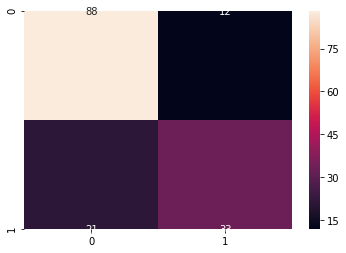

In [22]:
conf = confusion_matrix(Y_test,predictions)

label = ["0","1"]
sns.heatmap(conf, annot=True, xticklabels=label, yticklabels=label)